In [802]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier


In [803]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [804]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

[Text(0, 0, 'Not survived :('), Text(1, 0, 'Survived! :D')]

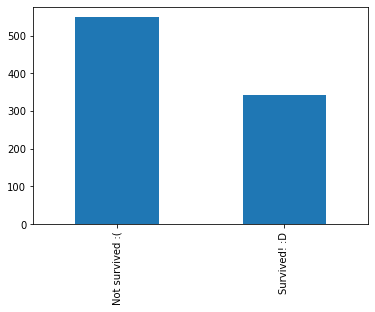

In [805]:
ax = df['Survived'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Not survived :(', 'Survived! :D'])

#### Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.



In [806]:
df['Survived'][df['Pclass'] == 1].value_counts(normalize=True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

#### Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.



<AxesSubplot:xlabel='Pclass'>

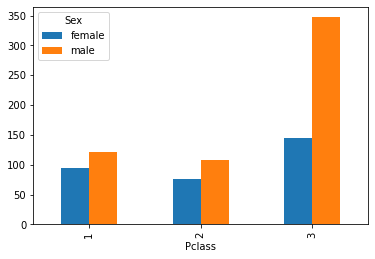

In [807]:
df_group = df.groupby(['Pclass','Sex'])['Sex'].count()
df_group.unstack().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

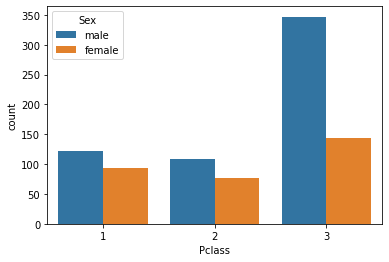

In [808]:
sns.countplot(x='Pclass', hue='Sex', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

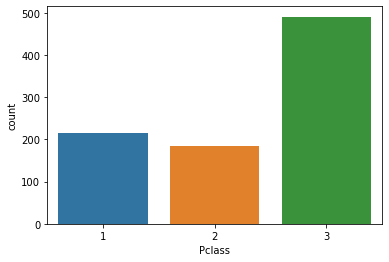

In [809]:
sns.countplot(x='Pclass', data=df)

#### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:ylabel='Frequency'>

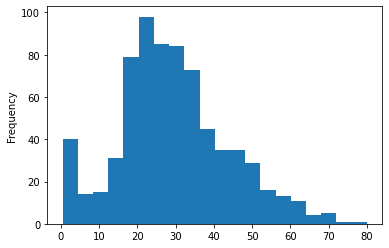

In [810]:
df.Age.plot(kind='hist', bins = 20)

In [811]:
df['Age'][df['Survived']==0]

PassengerId
1      22.0
5      35.0
6       NaN
7      54.0
8       2.0
       ... 
885    25.0
886    39.0
887    27.0
889     NaN
891    32.0
Name: Age, Length: 549, dtype: float64

#### Compare surviving/non-surviving passengers.

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

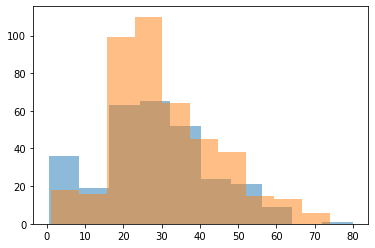

In [812]:
#with matplotlib

plt.hist(df['Age'][df['Survived']==1], alpha=0.5)
plt.hist(df['Age'][df['Survived']==0], alpha=0.5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

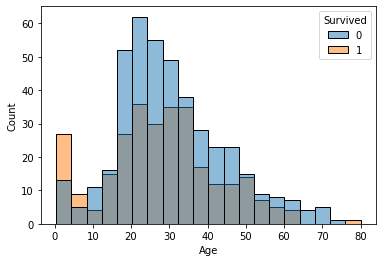

In [813]:
#with seaborn

sns.histplot(x='Age', hue='Survived', data=df)

#### Calculate the average age for survived and drowned passengers separately.



In [814]:
mean_age_survived = df['Age'][df['Survived'] == 1].mean()
mean_age_survived = round(mean_age_survived, 1)

mean_age_died = df['Age'][df['Survived'] == 0].mean()
mean_age_died = round(mean_age_died, 1)

print('Average age of people who survived')
print(round(mean_age_survived, 1))

print('Average age of people who died')
print(round(mean_age_died, 1))

Average age of people who survived
28.3
Average age of people who died
30.6


In [815]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

#### Replace missing age values by the mean age.

In [816]:
mean_age = round(df['Age'].mean(),1)
mean_age

29.7

In [817]:
df['Age'].fillna(mean_age, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [818]:
df.groupby(['Pclass', 'Sex'])['Survived'].count().to_frame().reset_index()

,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


#### Build a Logistic Regression model

In [819]:
X = df[['Pclass']]
y = df['Survived']

In [820]:
#x should always have a number in the shape for column. Y is fine without
print(X.shape)
print(y.shape)

(891, 1)
(891,)


In [821]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [822]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [823]:
#optional normalizing

#x_train = (x_train - x_train.mean()) / x_train.std()
#x_test = (x_test - x_test.mean()) / x_test.std()

In [824]:
model = LogisticRegression()

In [825]:
model.fit(X_train, y_train)

LogisticRegression()

##### Print the coefficients calculated by the model.

In [826]:
model.coef_, model.intercept_

(array([[-0.80800402]]), array([1.33719422]))

In [827]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.672752808988764
0.7039106145251397


##### Calculate the probabilities for your data points belonging to the positive class.

In [828]:
prob = model.predict_proba(X)
prob

array([[0.74778203, 0.25221797],
       [0.37070578, 0.62929422],
       [0.74778203, 0.25221797],
       ...,
       [0.74778203, 0.25221797],
       [0.37070578, 0.62929422],
       [0.74778203, 0.25221797]])

In [829]:
y_pred_test = (model.predict_proba(X)[:,1] >= 0.9)
#y_pred_test

In [830]:
#sum the number of people likely to survive based on threshold

sum_likely_to_survive = 0

for y in y_pred_test:
    if y==True:
        sum_likely_to_survive += 1
        
    else:
        continue
        
print(sum_likely_to_survive)

0


Changing the threshold to 0.9 means we are asking if there was a 90% chance that this person would survive

There are very little results

On the other hand, if we're asking if there was 10% chance this person would survive, most of the results are positive

#### Add the option class_weight='balanced' to even out the bias caused by the non-survivors outnumbering the survivors.



In [831]:
balanced_model = LogisticRegression(class_weight='balanced')

In [832]:
balanced_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [833]:
balanced_model.coef_, balanced_model.intercept_

#as a note, the coef and intercept of the non-balanced model were:
#(array([[-0.80800402]]), array([1.33719422]))

(array([[-0.81546945]]), array([1.85856922]))

In [834]:
balanced_model.score(X_train, y_train)

0.6657303370786517

#### Create a few ColumnTransformers and train them on the Titanic data

We start by reloading the dataframe to reset the transformations made above

In [835]:
df = pd.read_csv('train.csv', index_col='PassengerId')

In [836]:
X = df[['Name','Pclass','Sex','Age','Fare','Embarked', 'SibSp', 'Parch', 'Cabin']]
y = df['Survived']

In [837]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= 100)

In [838]:
#X_train_trans.shape, X_test_trans.shape, y_train_trans.shape, y_test_trans.shape

The title of each passenger can be extracted from the name to create a more useful column "Title"

In [839]:
def get_title(name):
    
    #titles_list = []
    
    split = name.split(".")
    title = split[0].split(",")[1].strip()
        #titles_list.append(title)
        
    return title
#get_title("Dooley, Mr. Patrick")

In [840]:
X_train['Title'] = X_train['Name'].apply(get_title)
X_train['mean_age'] = X_train.groupby('Title')['Age'].transform("mean")
X_train['Age'] = X_train.apply(lambda x: round(x['mean_age'],0) if pd.isna(x['Age']) else x['Age'], axis=1)
X_train.drop(['mean_age', 'Name'], axis=1, inplace=True)

In [841]:
X_test['Title'] = X_test['Name'].apply(get_title)
X_test['mean_age'] = X_test.groupby('Title')['Age'].transform("mean")
X_test['Age'] = X_test.apply(lambda x: round(x['mean_age'],0) if pd.isna(x['Age']) else x['Age'], axis=1)
X_test.drop(['mean_age','Name'], axis=1, inplace=True)


The number of Siblings and Parents/Children can be combined into a Family_aboard column

In [842]:
X_train['Family_aboard'] = X_train['SibSp'] + X_train['Parch']
X_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [843]:
X_test['Family_aboard'] = X_test['SibSp'] + X_test['Parch']
X_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

The cabin and fare can be used to create a new column that groups people who were far above the water

In [844]:
def modify_cabins(cabin):
        cabin = cabin[0]
        return cabin

In [845]:
X_train['Cabin'] = X_train['Cabin'].apply(lambda x: modify_cabins(x) if pd.notnull(x) else x)
X_train['Above_deck'] = X_train.apply(lambda x: 1 if (x['Fare'] > 100 or x['Cabin'] in ['A','B','C']) else 0, axis=1)
X_train.drop('Cabin', axis=1, inplace=True)

In [846]:
X_test['Cabin'] = X_test['Cabin'].apply(lambda x: modify_cabins(x) if pd.notnull(x) else x)
X_test['Above_deck'] = X_test.apply(lambda x: 1 if (x['Fare'] > 100 or x['Cabin'] in ['A','B','C']) else 0, axis=1)
X_test.drop('Cabin', axis=1, inplace=True)

In [847]:
X_test.shape,  y_test.shape, X_train.shape, y_train.shape

((223, 8), (223,), (668, 8), (668,))

We can now proceed with the transformations of our columns

In [848]:
pipeline_family = Pipeline([
    ("binning", KBinsDiscretizer(n_bins=2, encode='onehot-dense', strategy='kmeans')),
])

In [849]:
pipeline_sex = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False, drop="if_binary")),
])

In [850]:
pipeline_age = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("binning", KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform'))
])

In [851]:
pipeline_embarked = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

In [852]:
pipeline_fare = Pipeline([
    ("binning", KBinsDiscretizer(n_bins=2, encode='onehot-dense', strategy='uniform'))
])

In [853]:
pipeline_class = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

In [854]:
pipeline_deck = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary'))
])

In [855]:
transformer = ColumnTransformer(
    [
        ("embarked", pipeline_embarked, ['Embarked']),
        ("family", pipeline_family, ['Family_aboard']),
        ("sex", pipeline_sex, ['Sex']),
        ('fare', pipeline_fare, ['Fare']),
        ("age", pipeline_age, ['Age']),
        ("class", pipeline_class, ['Pclass']),
        ("deck", pipeline_deck, ['Above_deck'])
    ]
)

In [856]:
"""pipeline = Pipeline(
    [
        ('preprocessor', transformer),
        ('clf', LogisticRegression())
    ]
)"""

"pipeline = Pipeline(\n    [\n        ('preprocessor', transformer),\n        ('clf', LogisticRegression())\n    ]\n)"

In [857]:
"""pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
len(y_pred)"""

'pipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_test)\nlen(y_pred)'

In [858]:
len(y_test)

223

In [859]:
X_train_FE = transformer.fit_transform(X_train)
X_test_FE = transformer.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train_FE, y_train)

LogisticRegression()

In [860]:
print('Accuracy score training dataset')
print(clf.score(X_train_FE, y_train))
print()
print('Accuracy score test dataset')
print(clf.score(X_test_FE, y_test) )

Accuracy score training dataset
0.8248502994011976

Accuracy score test dataset
0.7982062780269058


In [861]:
#clf.predict(X_test_FE)

Benchmark score to beat:
0.8158682634730539

Test score to beat:
0.8565022421524664


#### Calculations of scores

In [862]:
#accuracy
accuracy_score_train = accuracy_score(y_train, clf.predict(X_train_FE), normalize=True)
accuracy_score_test = accuracy_score(y_test, clf.predict(X_test_FE), normalize=True)

#precision
precision_score_train = precision_score(y_train, clf.predict(X_train_FE))
precision_score_test = precision_score(y_test, clf.predict(X_test_FE))

#recall
recall_score_train = recall_score(y_train, clf.predict(X_train_FE))
recall_score_test = recall_score(y_test, clf.predict(X_test_FE))

#area under the curve
y_pred_proba_test = clf.predict_proba(X_test_FE)[::,1]
auc_test = roc_auc_score(y_test, y_pred_proba_test)

y_pred_proba_train = clf.predict_proba(X_train_FE)[::,1]
auc_train = roc_auc_score(y_train, y_pred_proba_train)

The scores will be more readeable in a dataframe format

In [863]:
training_scores = [accuracy_score_train, precision_score_train, recall_score_train, auc_train]
test_scores = [accuracy_score_test, precision_score_test, recall_score_test, auc_test]

d = {'Metrics': ['accuracy', 'precision','recall','auc'], 'Train': training_scores, 'Test': test_scores}

df_scores = pd.DataFrame(data=d)
df_scores

,Metrics,Train,Test
0,accuracy,0.824850,0.798206
1,precision,0.802817,0.840000
2,recall,0.695122,0.656250
3,auc,0.869567,0.852034


RoC curve

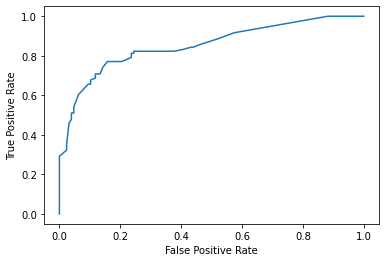

In [864]:
fpr_test, tpr_test, _test = roc_curve(y_test,  y_pred_proba_test)

plt.plot(fpr_test,tpr_test)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Implement a random forest

In [865]:
from sklearn.ensemble import RandomForestClassifier

In [866]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [867]:
X=df[['Pclass','Name','Sex','Age','SibSp', 'Parch', 'Fare','Cabin', 'Embarked']]
y=df['Survived']
X.shape

(891, 9)

In [868]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= 42)

In [869]:
def get_title(name):
    
    #titles_list = []
    
    split = name.split(".")
    title = split[0].split(",")[1].strip()
        #titles_list.append(title)
        
    return title
#get_title("Dooley, Mr. Patrick")

In [870]:
X_train['Title'] = X_train['Name'].apply(get_title)
X_train['mean_age'] = X_train.groupby('Title')['Age'].transform("mean")
X_train['Age'] = X_train.apply(lambda x: round(x['mean_age'],0) if pd.isna(x['Age']) else x['Age'], axis=1)
X_train.drop(['mean_age','Name'], axis=1, inplace=True)

In [871]:
X_test['Title'] = X_test['Name'].apply(get_title)
X_test['mean_age'] = X_test.groupby('Title')['Age'].transform("mean")
X_test['Age'] = X_test.apply(lambda x: round(x['mean_age'],0) if pd.isna(x['Age']) else x['Age'], axis=1)
X_test.drop(['mean_age','Name'], axis=1, inplace=True)

In [872]:
X_train['Family_aboard'] = X_train['SibSp'] + X_train['Parch']
X_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [873]:
X_test['Family_aboard'] = X_test['SibSp'] + X_test['Parch']
X_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [874]:
def modify_cabins(cabin):
        cabin = cabin[0]
        return cabin

In [875]:
X_train['Cabin'] = X_train['Cabin'].apply(lambda x: modify_cabins(x) if pd.notnull(x) else x)
X_train['Above_deck'] = X_train.apply(lambda x: 1 if (x['Fare'] > 100 or x['Cabin'] in ['A','B','C']) else 0, axis=1)
X_train.drop(['Cabin'], axis=1, inplace=True)

In [876]:
X_test['Cabin'] = X_test['Cabin'].apply(lambda x: modify_cabins(x) if pd.notnull(x) else x)
X_test['Above_deck'] = X_test.apply(lambda x: 1 if (x['Fare'] > 100 or x['Cabin'] in ['A','B','C']) else 0, axis=1)
X_test.drop(['Cabin'], axis=1, inplace=True)

In [877]:
X_test.shape,  y_test.shape, X_train.shape, y_train.shape

((223, 8), (223,), (668, 8), (668,))

In [878]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,Family_aboard,Above_deck
PassengerId,,,,,,,,
299,1,male,32.00,30.5000,S,Mr,0,1
885,3,male,25.00,7.0500,S,Mr,0,0
248,2,female,24.00,14.5000,S,Mrs,2,0
479,3,male,22.00,7.5208,S,Mr,0,0
306,1,male,0.92,151.5500,S,Master,3,1
...,...,...,...,...,...,...,...,...
107,3,female,21.00,7.6500,S,Miss,0,0
271,1,male,32.00,31.0000,S,Mr,0,0
861,3,male,41.00,14.1083,S,Mr,2,0


In [879]:
X_train_FE = transformer.fit_transform(X_train)
X_test_FE = transformer.transform(X_test)

In [880]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7,criterion='entropy')
rf.fit(X_train_FE, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200)

In [881]:
importance=rf.feature_importances_

In [882]:
importance_list = list(zip(importance, X_train.columns))
importance_list.sort(key=lambda x: x[0], reverse = True)
importance_list

[(0.5228603298935169, 'Title'),
 (0.025780960551851462, 'Age'),
 (0.024910752429214134, 'Fare'),
 (0.02373802089836802, 'Pclass'),
 (0.023445391571629212, 'Embarked'),
 (0.014971719372307138, 'Sex'),
 (0.0065018176171403805, 'Above_deck'),
 (0.006471040038039606, 'Family_aboard')]

In [883]:
#accuracy
rf_accuracy_score_train = accuracy_score(y_train, rf.predict(X_train_FE), normalize=True)
rf_accuracy_score_test = accuracy_score(y_test, rf.predict(X_test_FE), normalize=True)

#precision
rf_precision_score_train = precision_score(y_train, rf.predict(X_train_FE))
rf_precision_score_test = precision_score(y_test, rf.predict(X_test_FE))

#recall
rf_recall_score_train = recall_score(y_train, rf.predict(X_train_FE))
rf_recall_score_test = recall_score(y_test, rf.predict(X_test_FE))

#area under the curve
rf_y_pred_proba = rf.predict_proba(X_test_FE)[::,1]
rf_auc_test = roc_auc_score(y_test, rf_y_pred_proba)

rf_y_pred_proba_train = rf.predict_proba(X_train_FE)[::,1]
rf_auc_train = roc_auc_score(y_train, rf_y_pred_proba_train)

In [884]:
training_scores = [rf_accuracy_score_train, rf_precision_score_train, rf_recall_score_train, rf_auc_train]
test_scores = [rf_accuracy_score_test, rf_precision_score_test, rf_recall_score_test, rf_auc_test]

d = {'Metrics': ['accuracy', 'precision','recall','auc'], 'Train': training_scores, 'Test': test_scores}

df_scores_rf = pd.DataFrame(data=d)
df_scores_rf

,Metrics,Train,Test
0,accuracy,0.820359,0.816143
1,precision,0.898204,0.852941
2,recall,0.592885,0.651685
3,auc,0.881251,0.883783


In [885]:
df_scores

,Metrics,Train,Test
0,accuracy,0.824850,0.798206
1,precision,0.802817,0.840000
2,recall,0.695122,0.656250
3,auc,0.869567,0.852034


#### Implement a Dummy Classifier

In [886]:
df = pd.read_csv('train.csv', index_col='PassengerId')

X = df
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5,random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
#dummy_clf.predict(X_train)
#dummy_clf.predict(X_test)

(445, 11) (446, 11) (445,) (446,)


DummyClassifier(strategy='stratified')

In [887]:
dummy_recall_score_train = recall_score(y_train, dummy_clf.predict(X_train))
dummy_recall_score_test = recall_score(y_test, dummy_clf.predict(X_test))

print(dummy_recall_score_train)
print(dummy_recall_score_test)

0.34355828220858897
0.4022346368715084
